**IMPORTS:**

In [ ]:
from fastai.vision.all import *
from fastai.vision.widgets import *
from fastdownload import download_url

In [ ]:
!pip install fastinference

**KAGGLE:**

In [ ]:
! pip install kaggle

     |████████████████████████████████| 58 kB 11.2 MB/s eta 0:00:01
     |████████████████████████████████| 78 kB 12.9 MB/s eta 0:00:01
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73052 sha256=eb067a7f7b14abfc59d7bfbe132eb72695ba07d0c5c4de80c6b0dbd0892b257c
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

**DOWNLOADING DATASET:**

In [ ]:
! kaggle datasets download ashishjangra27/face-mask-12k-images-dataset

100%|███████████████████████████████████████▉| 330M/330M [00:15<00:00, 22.3MB/s]
100%|████████████████████████████████████████| 330M/330M [00:15<00:00, 22.8MB/s]


In [ ]:
from zipfile import ZipFile
zip = ZipFile('face-mask-12k-images-dataset.zip')
zip.extractall()

In [ ]:
path=('Face Mask Dataset/Train')

**Number of Images:**

In [ ]:
fns=get_image_files(path)
len(fns)

10001

**DATABLOCK CREATION:**

One for RGB and the other for B/W

In [ ]:
dlb=DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2,seed=42),
    get_y=parent_label,
    item_tfms=Resize(224)
)

In [ ]:
dlb1=DataBlock(
    blocks=(ImageBlock(cls=PILImageBW), CategoryBlock),
get_items=get_image_files,
splitter=RandomSplitter(valid_pct=0.2,seed=42),
get_y=parent_label,
item_tfms=Resize(224)
)

**DATALOADERS:**

In [ ]:
dls=dlb.dataloaders(path, batch_size=10)
dls1=dlb1.dataloaders(path)


**TWO CLASSES:**

In [ ]:
dls.vocab

['WithMask', 'WithoutMask']

**SAMPLES: **

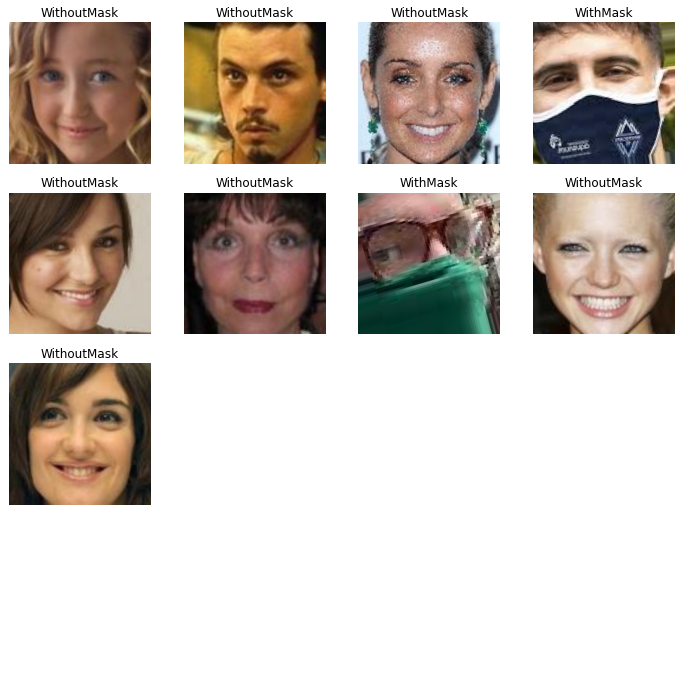

In [ ]:
dls.show_batch(cmap='Greys_r',nrows=4,ncols=4)

**Finding a suitable LEARNING RATE for ColourModel:**

**Pretrained Model: vgg16-bn**

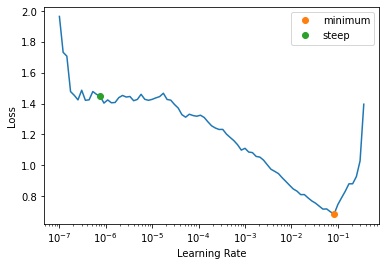

In [ ]:
model1=vision_learner(dls,vgg16_bn,metrics=error_rate)
lr_min,lr_steep=model.lr_find(suggest_funcs=(minimum,steep))


**Minimum and Steepest Point:**

In [ ]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

Minimum/10: 8.32e-03, steepest point: 7.59e-07


**Training with Specified LR Range:**

In [ ]:
model1.fit_one_cycle(4,lr_max=slice(7.59e-07,8.32e-03))

epoch,train_loss,valid_loss,error_rate,time
0,0.043800,0.105862,0.009000,04:35
1,0.112420,0.334946,0.004500,04:34
2,0.022975,0.003266,0.001000,04:35
3,0.025131,0.006181,0.002500,04:34


**Confusion Matrix:**

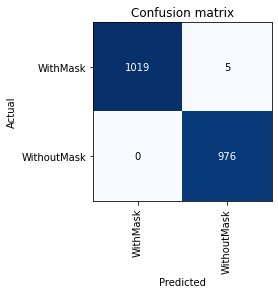

In [ ]:
cm=ClassificationInterpretation.from_learner(model1)
cm.plot_confusion_matrix()

**Exporting Colour Model:**

In [ ]:
model1.export("exportNew.pkl")


In [ ]:
path=Path()
path.ls(file_exts='.pkl')

(#2) [Path('exportNew.pkl'),Path('export.pkl')]

In [ ]:
model1.predict("Face Mask Dataset/Validation/WithMask/1204.png")

('WithMask', TensorBase(0), TensorBase([9.9997e-01, 3.2377e-05]))

**Sample for B/W Model:**

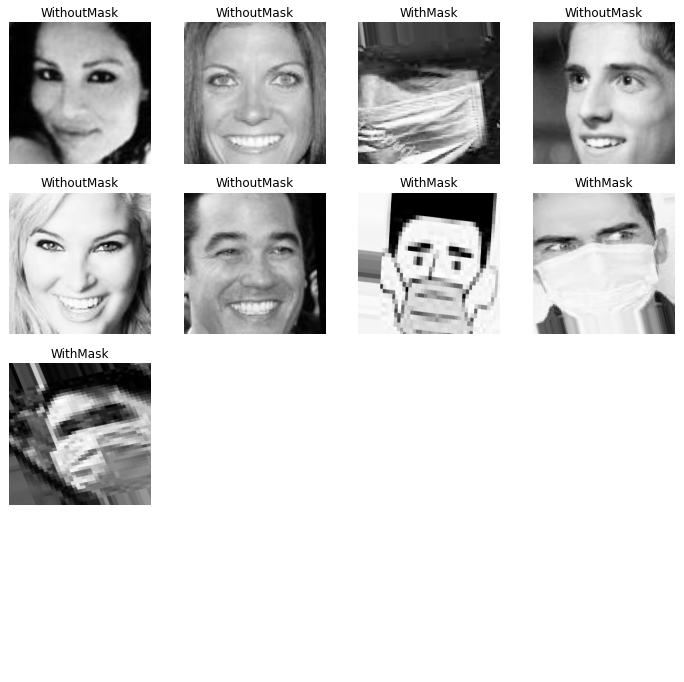

In [ ]:
dls1.show_batch(cmap='Greys_r',nrows=4,ncols=4)

**LR B/W**

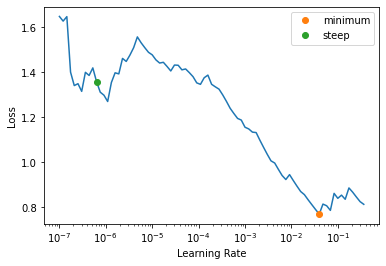

In [ ]:
model=vision_learner(dls1,vgg16_bn,metrics=error_rate)
lr_min,lr_steep=model.lr_find(suggest_funcs=(minimum,steep))

In [ ]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

Minimum/10: 3.98e-03, steepest point: 6.31e-07


**Training B/W Model:**

In [ ]:
model.fit_one_cycle(10,lr_max=slice(1e-05,3.98e-03))

epoch,train_loss,valid_loss,error_rate,time
0,0.169103,0.045498,0.015500,04:34
1,0.151444,0.022317,0.005000,04:36
2,0.085494,0.014296,0.004500,04:36
3,0.081144,0.012333,0.002500,04:35
4,0.072930,0.009748,0.002500,04:35
5,0.126169,0.012445,0.002500,04:36
6,0.034980,0.008483,0.003000,04:35
7,0.077442,0.004663,0.001500,04:36
8,0.051411,0.008041,0.002000,04:36
9,0.039590,0.007072,0.002000,04:36


**Confusion Matrix:**

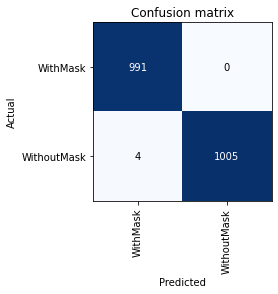

In [ ]:
cm=ClassificationInterpretation.from_learner(model)
cm.plot_confusion_matrix()

**Export:**

In [ ]:
model.export()

In [ ]:
model.predict('test.jpg')

('WithMask', TensorBase(0), TensorBase([1.0000e+00, 1.6651e-10]))

In [ ]:
path=Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]